In [ ]:
import pandas as pd

# Load the pickle file
pickle_file = "/content/gender_noun_dims.pickle"  # Update path if needed
data = pd.read_pickle(pickle_file)

# Convert dictionary to DataFrame if needed
if isinstance(data, dict):
    df = pd.DataFrame.from_dict(data, orient="index")
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Feature"}, inplace=True)

# List of columns to drop (including the ones you specified)
columns_to_drop = [
    "ANOVA", "MI", "All non ind", "LR1", "Corr1", "All imp dims1",
    "LR5", "Corr5", "All imp dims5", "LR10", "Corr10", "All imp dims10",
    "LR25", "Corr25", "All imp dims25", "LR50", "Corr50", "All imp dims50",
    "LR75", "Corr75", "All imp dims75",
    # Your specified columns:
    "All dims", "All imp dims5", "LR10", "All imp dims50", "LR75"
]

# Drop columns if they exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Save cleaned DataFrame to CSV
csv_file = "/content/gender_noun_dims_1.csv"  # Update path if needed
df.to_csv(csv_file, index=False)

print(f"✅ Pickle file cleaned and converted to CSV: {csv_file}")


✅ Pickle file cleaned and converted to CSV: /content/gender_noun_dims_1.csv


In [ ]:
import pandas as pd
import re
# Load SHAP feature importance CSV
shap_df = pd.read_csv("/content/shap_feature_importance_all_models.csv")

# Load Ekaterina's stable dimensions
ekaterina_df = pd.read_csv("/content/gender_noun_dims_1.csv")

# Convert features to sets for comparison
shap_dimensions = set(shap_df["Feature"].astype(str))  # Ensure consistency in datatype
# Extract numeric part from SHAP feature names
shap_df["Feature"] = shap_df["Feature"].astype(str).apply(lambda x: re.sub(r"\D", "", x))

# Print quick summary
print(f"✅ Total SHAP Features: {len(shap_dimensions)}")


✅ Total SHAP Features: 1024


In [ ]:
shap_df

,Feature,camem_bert_base_embeddings,distilled_bert_base_cased,flaubert_base_cased,flaubert_base_uncased,flaubert_large_uncased,flaubert_small_cased,mbert_base_cased,mbert_base_uncased,xlmr_r_large,xlm_roberta_base,Mean Importance
0,1012,NaN,NaN,NaN,NaN,0.017380,NaN,NaN,NaN,0.052533,NaN,0.034956
1,971,NaN,NaN,NaN,NaN,0.018363,NaN,NaN,NaN,0.039607,NaN,0.028985
2,453,0.005313,0.013851,0.021146,0.025093,0.010345,0.026715,0.107030,0.038046,0.019581,0.001145,0.026827
3,934,NaN,NaN,NaN,NaN,0.024552,NaN,NaN,NaN,0.028338,NaN,0.026445
4,198,0.052400,0.013961,0.006006,0.029648,0.010734,0.043431,0.062678,0.012758,0.022906,0.001636,0.025616
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1004,NaN,NaN,NaN,NaN,0.003230,NaN,NaN,NaN,0.001427,NaN,0.002329
1020,834,NaN,NaN,NaN,NaN,0.002809,NaN,NaN,NaN,0.001564,NaN,0.002187
1021,833,NaN,NaN,NaN,NaN,0.003884,NaN,NaN,NaN,0.000281,NaN,0.002083
1022,1019,NaN,NaN,NaN,NaN,0.000921,NaN,NaN,NaN,0.002310,NaN,0.001616


In [ ]:
unique_features = ekaterina_df["Feature"].unique()
print(unique_features)


['flau_small_c' 'flau_base_u' 'flau_base_c' 'flau_large_c' 'cam_base'
 'xlm_large' 'xlm_base' 'bert_base_u' 'distilbert_base' 'bert_base_c']


In [ ]:
#PercX → Features chosen by Perceptron (Top X%)
ekaterina_df.columns

Index(['Feature', 'Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75'], dtype='object')

In [ ]:
ekaterina_df

,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[[434, 316, 507, 245, 100], [434, 162, 245, 31...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,..."
1,flau_base_u,"[[382, 433, 17, 508, 138, 735, 130], [382, 138...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ..."
2,flau_base_c,"[[209, 526, 71, 752, 70, 425, 130], [526, 749,...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2..."
3,flau_large_c,"[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862..."
4,cam_base,"[[685, 699, 75, 147, 173, 579, 368], [558, 702...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1..."
5,xlm_large,"[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ..."
6,xlm_base,"[[616, 175, 311, 307, 517, 114, 257], [70, 616...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ..."
7,bert_base_u,"[[565, 15, 412, 204, 11, 145, 515], [332, 758,...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4..."
8,distilbert_base,"[[488, 727, 1, 51, 207, 76, 302], [727, 1, 270...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,..."
9,bert_base_c,"[[135, 742, 30, 548, 566, 270, 610], [721, 548...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ..."


In [ ]:
# Function to clean up perceptron columns by merging sublists into one unique list
def clean_perceptron_column(column):
    cleaned_data = []
    for row in column:
        # Flatten the list and perform union to remove duplicates
        flattened = set([item for sublist in row for item in sublist])
        cleaned_data.append(list(flattened))
    return cleaned_data

# Apply cleaning to each perceptron column (Perc1, Perc5, Perc10, etc.)
for col in ['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']:
    df[col] = clean_perceptron_column(df[col])

# Save cleaned DataFrame to CSV
csv_file = "/content/gender_noun_dims_cleaned.csv"  # Update path if needed
df.to_csv(csv_file, index=False)

print(f"✅ Data cleaned and saved to CSV: {csv_file}")

✅ Data cleaned and saved to CSV: /content/gender_noun_dims_cleaned.csv


In [ ]:
ekaterina=pd.read_csv('/content/gender_noun_dims_cleaned.csv')
ekaterina.head(3)

,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[162, 100, 434, 245, 377, 507, 316]","[387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...","[256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...","[0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...","[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."
1,flau_base_u,"[130, 546, 456, 138, 671, 433, 17, 307, 81, 21...","[1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...","[1, 2, 515, 516, 5, 519, 9, 522, 525, 17, 21, ...","[0, 1, 2, 5, 9, 10, 11, 13, 15, 17, 21, 24, 25...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,flau_base_c,"[130, 611, 70, 71, 359, 425, 587, 749, 526, 75...","[513, 130, 517, 261, 136, 526, 398, 272, 401, ...","[513, 517, 10, 526, 529, 17, 22, 537, 26, 538,...","[0, 513, 3, 517, 7, 519, 8, 10, 523, 13, 526, ...","[0, 1, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [ ]:
model = 'flau_small_c'  # Example model
perc_column = 'Perc1'  # Example percentage
print(ekaterina[ekaterina['Feature'] == model][perc_column].values)


['[162, 100, 434, 245, 377, 507, 316]']


In [ ]:
# Define the models and percentage column
models = ['flau_small_c', 'cam_base']
perc_column = 'Perc1'

# Extract the data for both models and the specified percentage column
data = []

for model in models:
    model_data = ekaterina[ekaterina['Feature'] == model][[perc_column]]
    model_data['Model'] = model  # Add the model name as a new column
    data.append(model_data)

# Combine the data for both models into a single DataFrame
combined_df = pd.concat(data, ignore_index=True)

# Display the result
print(combined_df)


                                               Perc1         Model
0                [162, 100, 434, 245, 377, 507, 316]  flau_small_c
1  [384, 129, 7, 648, 401, 147, 35, 685, 173, 558...      cam_base


# Find common features between SHAP-selected and Ekaterina's PercX for each model.

alphas = [1, 5, 10, 25, 50, 75]

Steps:

Find Common Features: Compare each model’s SHAP top features with Ekaterina's PercX columns .we will find the common feature between the shap selected features and each of the perpXfeatures for each model

Identify Unique SHAP Features (not in Ekaterina’s set).

Compute Overlap Percentage

Print Summary Results.

# Extract SHAP-selected features based on importance scores for each percentage.

In this step, we will extract the top features for each model based on their SHAP importance scoresWe'll need to select features based on the percentage of the total feature count

In [ ]:
shap_models = [col for col in shap_df.columns if col not in ["Feature", "Mean Importance"]]
shap_models

['camem_bert_base_embeddings',
 'distilled_bert_base_cased',
 'flaubert_base_cased',
 'flaubert_base_uncased',
 'flaubert_large_uncased',
 'flaubert_small_cased',
 'mbert_base_cased',
 'mbert_base_uncased',
 'xlmr_r_large',
 'xlm_roberta_base']

In [ ]:
# Define percentage levels for SHAP-selected features (1%, 5%, 10%, 25%, 50%, 75%)
top_feature_percentages = [1,5,10,25, 50,75]

# Dictionary to store top features per model and percentage
top_shap_features = {}

# Loop through each model to extract top SHAP features based on importance scores
for model in shap_models:
    top_shap_features[model] = {}

    print(f"\n🔹 Extracted Top SHAP Features for Model: **{model}**")

    #  Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        num_features = int((percent / 100) * len(shap_df))  # Compute number of top features

        # Sort the SHAP dataframe by the importance values for the current model
        sorted_shap_df = shap_df.sort_values(by=model, ascending=False)
        #Select the top N features
        selected_features = sorted_shap_df.iloc[:num_features]["Feature"].tolist()

       # Store the selected top features for the current model and percentage
        top_shap_features[model][percent] = set(selected_features)

        # Print formatted output
        print(f"   ✅ Top {percent}% SHAP Features: {len(top_shap_features[model][percent])}")
        print(f"   🔹 Sample Features: {list(top_shap_features[model][percent])[:10]}")

    print("-" * 60)  # Add separator for readability



🔹 Extracted Top SHAP Features for Model: **camem_bert_base_embeddings**
   ✅ Top 1% SHAP Features: 10
   🔹 Sample Features: ['465', '198', '454', '713', '144', '579', '692', '714', '147', '23']
   ✅ Top 5% SHAP Features: 51
   🔹 Sample Features: ['171', '393', '243', '450', '518', '713', '441', '579', '435', '91']
   ✅ Top 10% SHAP Features: 102
   🔹 Sample Features: ['171', '12', '450', '518', '713', '529', '204', '322', '280', '512']
   ✅ Top 25% SHAP Features: 256
   🔹 Sample Features: ['171', '12', '691', '450', '518', '738', '713', '413', '757', '78']
   ✅ Top 50% SHAP Features: 512
   🔹 Sample Features: ['642', '450', '738', '713', '210', '741', '535', '35', '412', '620']
   ✅ Top 75% SHAP Features: 768
   🔹 Sample Features: ['642', '450', '738', '186', '713', '333', '49', '210', '564', '741']
------------------------------------------------------------

🔹 Extracted Top SHAP Features for Model: **distilled_bert_base_cased**
   ✅ Top 1% SHAP Features: 10
   🔹 Sample Features: ['7

In [ ]:
# Print a sample of data from the PercX columns to understand its format
sample_model = ekaterina.iloc[0]  # Inspect the first row (or any specific row)
print("Sample data for PercX columns:", sample_model[['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']])


Sample data for PercX columns: Perc1                   [162, 100, 434, 245, 377, 507, 316]
Perc5     [387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...
Perc10    [256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...
Perc25    [0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...
Perc50    [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...
Perc75    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...
Name: 0, dtype: object


In [ ]:
import pandas as pd
import random

# Assuming 'df' is the dataframe with the cleaned data

# Iterate over each model in the dataset
for index, row in df.iterrows():
    model_name = row['Feature']
    print(f"🔹 Extracted Top ekaterina Features for Model: {model_name}")

    # Iterate over each PercX (1%, 5%, 10%, etc.)
    for perc in ['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']:
        perc_features = row[perc]  # List of features for the current PercX

        # Get the number of top features based on the PercX (1%, 5%, 10%, etc.)
        top_n = len(perc_features)

        # Print the percentage and sample of the features
        print(f"   ✅ Top {perc[4:]}%: {top_n}")
        print(f"   🔹 Sample Features: {random.sample(perc_features, min(10, len(perc_features)))}")

    print("\n")  # For spacing between models


🔹 Extracted Top ekaterina Features for Model: flau_small_c
   ✅ Top 1%: 7
   🔹 Sample Features: [316, 507, 245, 434, 100, 162, 377]
   ✅ Top 5%: 33
   🔹 Sample Features: [28, 234, 468, 499, 100, 195, 74, 306, 5, 316]
   ✅ Top 10%: 67
   🔹 Sample Features: [133, 195, 387, 335, 121, 426, 213, 256, 490, 279]
   ✅ Top 25%: 158
   🔹 Sample Features: [54, 419, 162, 510, 336, 352, 0, 156, 115, 248]
   ✅ Top 50%: 315
   🔹 Sample Features: [415, 283, 389, 196, 93, 123, 270, 489, 27, 295]
   ✅ Top 75%: 450
   🔹 Sample Features: [202, 439, 236, 232, 118, 264, 133, 176, 117, 172]


🔹 Extracted Top ekaterina Features for Model: flau_base_u
   ✅ Top 1%: 14
   🔹 Sample Features: [546, 382, 138, 696, 735, 21, 307, 130, 17, 508]
   ✅ Top 5%: 78
   🔹 Sample Features: [644, 629, 433, 60, 333, 660, 507, 597, 573, 169]
   ✅ Top 10%: 143
   🔹 Sample Features: [698, 525, 149, 429, 21, 2, 229, 263, 24, 644]
   ✅ Top 25%: 333
   🔹 Sample Features: [703, 98, 599, 462, 630, 59, 538, 562, 660, 516]
   ✅ Top 50%: 

In [ ]:
# Create a custom mapping between SHAP model names and Ekaterina's feature names
model_mapping = {
    'camem_bert_base_embeddings': 'cam_base',
    'distilled_bert_base_cased': 'distilbert_base',
    'flaubert_base_cased': 'flau_base_c',
    'flaubert_base_uncased': 'flau_base_u',
    'flaubert_large_uncased': 'flau_large_c',
    'flaubert_small_cased': 'flau_small_c',
    'mbert_base_cased': 'bert_base_c',
    'mbert_base_uncased': 'bert_base_u',
    'xlmr_r_large': 'xlm_large',
    'xlm_roberta_base': 'xlm_base'
}

top_feature_percentages = [1, 5, 10, 25, 50, 75]
# Dictionary to store common features per model and percentage
common_features_per_model = {}

# Loop through each SHAP model and map it to the corresponding Ekaterina model
for shap_model in shap_models:
    # Check if the shap model is in the model mapping
    if shap_model not in model_mapping:
        print(f"⚠️ Model '{shap_model}' not found in model mapping. Skipping...")
        continue

    # Get the corresponding Ekaterina model name
    ekaterina_model = model_mapping[shap_model]

    common_features_per_model[shap_model] = {}

    print(f"\n🔹 **Model: {shap_model}**)")

    # Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        if shap_model not in top_shap_features or percent not in top_shap_features[shap_model]:
            continue

        # Extract SHAP-selected features for the current model and percentage
        shap_features = top_shap_features[shap_model][percent]

        # Check if the model exists in Ekaterina's DataFrame and if PercX column is available
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            # Check if the PercX column exists for the model
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                # Extract the corresponding PercX features from Ekaterina's file
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find common features between SHAP's top features and Ekaterina's PercX features
                common_features = shap_features.intersection(ekaterina_features)

                # Store the common features in the dictionary
                common_features_per_model[shap_model][percent] = common_features

                # Print results in the new requested format
                print(f"   ✅ Top {percent}% - Common Features ({len(common_features)}) : {list(common_features)}")
            else:
                print(f"   ⚠️ Perc{percent} column not found for model {ekaterina_model}. Skipping...")
        else:
            print(f"   ⚠️ Model '{ekaterina_model}' not found in Ekaterina's dataset. Skipping...")

    print("-" * 70)  # Separator for better readability



🔹 **Model: camem_bert_base_embeddings**)
   ✅ Top 1% - Common Features (0) : []
   ✅ Top 5% - Common Features (1) : ['8']
   ✅ Top 10% - Common Features (1) : ['8']
   ✅ Top 25% - Common Features (2) : ['8', '1']
   ✅ Top 50% - Common Features (6) : ['9', '1', '3', '6', '8', '5']
   ✅ Top 75% - Common Features (10) : ['0', '9', '7', '1', '3', '6', '4', '8', '2', '5']
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased**)
   ✅ Top 1% - Common Features (0) : []
   ✅ Top 5% - Common Features (1) : ['2']
   ✅ Top 10% - Common Features (1) : ['2']
   ✅ Top 25% - Common Features (3) : ['9', '1', '2']
   ✅ Top 50% - Common Features (7) : ['9', '7', '1', '3', '4', '8', '2']
   ✅ Top 75% - Common Features (10) : ['0', '9', '7', '1', '3', '6', '4', '8', '2', '5']
----------------------------------------------------------------------

🔹 **Model: flaubert_base_cased**)
   ✅ Top 1% - Common Features (0) : []
   ✅ Top 5% - Common Features (1)

# Identify unique dimensions in SHAP that are not in Ekaterina’s set.


In [ ]:
# Dictionary to store unique SHAP features per model and percentage
unique_shap_features_per_model = {}

# Loop through each SHAP model
for shap_model in shap_models:
    # Check if the SHAP model has a corresponding feature in Ekaterina's dataset
    if shap_model not in model_mapping:
        print(f"⚠️ Model '{shap_model}' not found in model mapping. Skipping...")
        continue

    # Get the corresponding Ekaterina model name
    ekaterina_model = model_mapping[shap_model]

    unique_shap_features_per_model[shap_model] = {}

    print(f"\n🔹 **Model: {shap_model}** (Mapped to Ekaterina: {ekaterina_model})")

    # Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        if shap_model not in top_shap_features or percent not in top_shap_features[shap_model]:
            continue

        # Extract SHAP-selected features for the current model and percentage
        shap_features = top_shap_features[shap_model][percent]

        # Check if the model exists in Ekaterina's DataFrame and if PercX column is available
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            # Check if the PercX column exists for the model
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                # Extract the corresponding PercX features from Ekaterina's file
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find SHAP features that are NOT in Ekaterina’s set (unique SHAP features)
                unique_shap_features = shap_features - ekaterina_features

                # Store the unique features in the dictionary
                unique_shap_features_per_model[shap_model][percent] = unique_shap_features

                # Print results in the requested format
                print(f"   ✅ Top {percent}% - Unique SHAP Features ({len(unique_shap_features)}) : {list(unique_shap_features)[:10]}")
            else:
                print(f"   ⚠️ Perc{percent} column not found for model {ekaterina_model}. Skipping...")
        else:
            print(f"   ⚠️ Model '{ekaterina_model}' not found in Ekaterina's dataset. Skipping...")

    print("-" * 70)  # Separator for better readability



🔹 **Model: camem_bert_base_embeddings** (Mapped to Ekaterina: cam_base)
   ✅ Top 1% - Unique SHAP Features (10) : ['465', '198', '454', '713', '144', '579', '692', '714', '147', '23']
   ✅ Top 5% - Unique SHAP Features (50) : ['171', '393', '243', '450', '518', '713', '441', '579', '435', '91']
   ✅ Top 10% - Unique SHAP Features (101) : ['171', '12', '243', '450', '518', '127', '713', '277', '435', '434']
   ✅ Top 25% - Unique SHAP Features (254) : ['12', '450', '738', '713', '413', '757', '599', '35', '620', '280']
   ✅ Top 50% - Unique SHAP Features (506) : ['642', '450', '738', '713', '210', '741', '535', '35', '412', '620']
   ✅ Top 75% - Unique SHAP Features (758) : ['642', '450', '738', '186', '713', '333', '49', '210', '564', '741']
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased** (Mapped to Ekaterina: distilbert_base)
   ✅ Top 1% - Unique SHAP Features (10) : ['70', '646', '354', '540', '762', '124', '652', '643', 

# Identify unique dimensions in SHAP that are not in Ekaterina’s set.


In [ ]:
# View the raw data for Perc1 column before cleaning
print("Original Perc1 column data:", df['Perc1'].iloc[0])

# Similarly, check Perc5, Perc10, etc.
print("Original Perc5 column data:", df['Perc5'].iloc[0])
print("Original Perc10 column data:", df['Perc10'].iloc[0])

Original Perc1 column data: [162, 100, 434, 245, 377, 507, 316]
Original Perc5 column data: [387, 133, 390, 7, 5, 28, 162, 292, 434, 306, 186, 443, 316, 318, 62, 192, 320, 195, 202, 74, 468, 477, 100, 377, 234, 490, 499, 115, 245, 117, 121, 250, 507]
Original Perc10 column data: [256, 387, 133, 5, 7, 390, 261, 265, 403, 20, 276, 147, 279, 25, 28, 160, 162, 292, 36, 40, 296, 426, 432, 434, 306, 181, 312, 186, 443, 316, 315, 318, 62, 192, 320, 193, 195, 198, 455, 202, 74, 332, 335, 210, 466, 468, 213, 470, 88, 477, 100, 488, 377, 234, 490, 363, 362, 237, 499, 115, 245, 117, 374, 121, 250, 507, 255]


In [ ]:
import ast
# Function to convert string representation of a list into an actual list
def convert_string_to_list(column):
    cleaned_data = []
    for row in column:
        # Convert the string representation of the list to an actual list of integers
        row_list = ast.literal_eval(row)
        cleaned_data.append(row_list)
    return cleaned_data

# Apply the conversion function to each PercX column
for col in ['Perc1', 'Perc5', 'Perc10']:
    ekaterina[col] = convert_string_to_list(ekaterina[col])

# Print the cleaned DataFrame
print(ekaterina[['Feature', 'Perc1', 'Perc5', 'Perc10']])

           Feature                                              Perc1  \
0     flau_small_c                [162, 100, 434, 245, 377, 507, 316]   
1      flau_base_u  [130, 546, 456, 138, 671, 433, 17, 307, 81, 21...   
2      flau_base_c  [130, 611, 70, 71, 359, 425, 587, 749, 526, 75...   
3     flau_large_c  [136, 552, 972, 15, 760, 862, 274, 182, 342, 1...   
4         cam_base  [384, 129, 7, 648, 401, 147, 35, 685, 173, 558...   
5        xlm_large  [136, 908, 526, 24, 153, 934, 939, 940, 173, 4...   
6         xlm_base  [257, 517, 135, 12, 268, 397, 527, 272, 39, 43...   
7      bert_base_u  [515, 643, 517, 10, 11, 270, 15, 145, 665, 412...   
8  distilbert_base  [320, 1, 673, 353, 196, 677, 37, 488, 713, 76,...   
9      bert_base_c  [704, 610, 195, 548, 742, 135, 270, 208, 721, ...   

                                               Perc5  \
0  [387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...   
1  [1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...   
2  [513, 130, 517, 261, 136,

In [ ]:
# Dictionary to store unique Ekaterina features per model and percentage
unique_ekaterina_features_per_model = {}

# Loop through each SHAP model
for shap_model in shap_models:
    # Check if the SHAP model has a corresponding feature in Ekaterina's dataset
    if shap_model not in model_mapping:
        print(f"⚠️ Model '{shap_model}' not found in model mapping. Skipping...")
        continue

    # Get the corresponding Ekaterina model name
    ekaterina_model = model_mapping[shap_model]

    unique_ekaterina_features_per_model[shap_model] = {}

    print(f"\n🔹 **Model: {shap_model}** ")

    # Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        if shap_model not in top_shap_features or percent not in top_shap_features[shap_model]:
            continue

        # Extract SHAP-selected features for the current model and percentage
        shap_features = top_shap_features[shap_model][percent]

        # Check if the model exists in Ekaterina's DataFrame and if PercX column is available
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            # Check if the PercX column exists for the model
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                # Extract the corresponding PercX features from Ekaterina's file
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find Ekaterina features that are NOT in SHAP (unique Ekaterina features)
                unique_ekaterina_features = ekaterina_features - shap_features

                # Store the unique features in the dictionary
                unique_ekaterina_features_per_model[shap_model][percent] = unique_ekaterina_features

                # Print results in the requested format
                print(f"   ✅ Top {percent}% - Unique Ekaterina Features ({len(unique_ekaterina_features)}) : {list(unique_ekaterina_features)[:10]}")
            else:
                print(f"   ⚠️ Perc{percent} column not found for model {ekaterina_model}. Skipping...")
        else:
            print(f"   ⚠️ Model '{ekaterina_model}' not found in Ekaterina's dataset. Skipping...")

    print("-" * 70)  # Separator for better readability



🔹 **Model: camem_bert_base_embeddings** 
   ✅ Top 1% - Unique Ekaterina Features (22) : [384, 129, 7, 648, 401, 147, 35, 685, 173, 558]
   ✅ Top 5% - Unique Ekaterina Features (113) : [512, 2, 6, 7, 523, 16, 18, 530, 531, 21]
   ✅ Top 10% - Unique Ekaterina Features (204) : [512, 2, 6, 7, 523, 525, 526, 15, 16, 529]
   ✅ Top 25% - Unique Ekaterina Features (12) : ['0', '9', '7', '6', '3', ']', '4', ',', '2', ' ']
   ✅ Top 50% - Unique Ekaterina Features (8) : ['0', '7', ']', '4', ',', '2', ' ', '[']
   ✅ Top 75% - Unique Ekaterina Features (4) : [',', ' ', ']', '[']
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased** 
   ✅ Top 1% - Unique Ekaterina Features (18) : [320, 1, 673, 353, 196, 677, 37, 488, 713, 76]
   ✅ Top 5% - Unique Ekaterina Features (101) : [512, 1, 515, 4, 517, 7, 9, 13, 531, 25]
   ✅ Top 10% - Unique Ekaterina Features (190) : [512, 1, 515, 4, 517, 7, 9, 10, 13, 526]
   ✅ Top 25% - Unique Ekaterina Features 

# Computes Percentage Overlap.


In [ ]:
# Dictionary to store percentage overlap per model and percentage
overlap_percentage_per_model = {}

# Loop through each SHAP model
for shap_model in shap_models:
    if shap_model not in model_mapping:
        print(f"⚠️ Model '{shap_model}' not found in model mapping. Skipping...")
        continue

    ekaterina_model = model_mapping[shap_model]
    overlap_percentage_per_model[shap_model] = {}

    print(f"\n🔹 **Model: {shap_model}**")

    for percent in top_feature_percentages:
        if shap_model not in top_shap_features or percent not in top_shap_features[shap_model]:
            continue

        shap_features = set(top_shap_features[shap_model][percent])

        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find common features
                common_features = shap_features.intersection(ekaterina_features)

                # Calculate overlap percentage
                total_features = len(shap_features)
                overlap_percentage = (len(common_features) / total_features) *
                100 if total_features > 0 else 0

                overlap_percentage_per_model[shap_model][percent] = overlap_percentage

                print(f"   ✅ Top {percent}% - Overlap Percentage: {overlap_percentage:.2f}% ({len(common_features)} / {total_features})")

    print("-" * 70)



🔹 **Model: camem_bert_base_embeddings**
   ✅ Top 1% - Overlap Percentage: 0.00% (0 / 10)
   ✅ Top 5% - Overlap Percentage: 0.00% (0 / 51)
   ✅ Top 10% - Overlap Percentage: 0.00% (0 / 102)
   ✅ Top 25% - Overlap Percentage: 0.78% (2 / 256)
   ✅ Top 50% - Overlap Percentage: 1.17% (6 / 512)
   ✅ Top 75% - Overlap Percentage: 1.30% (10 / 768)
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased**
   ✅ Top 1% - Overlap Percentage: 0.00% (0 / 10)
   ✅ Top 5% - Overlap Percentage: 0.00% (0 / 51)
   ✅ Top 10% - Overlap Percentage: 0.00% (0 / 102)
   ✅ Top 25% - Overlap Percentage: 1.17% (3 / 256)
   ✅ Top 50% - Overlap Percentage: 1.37% (7 / 512)
   ✅ Top 75% - Overlap Percentage: 1.30% (10 / 768)
----------------------------------------------------------------------

🔹 **Model: flaubert_base_cased**
   ✅ Top 1% - Overlap Percentage: 0.00% (0 / 10)
   ✅ Top 5% - Overlap Percentage: 0.00% (0 / 51)
   ✅ Top 10% - Overlap Percentage: 0.00

In [ ]:
import pandas as pd

# Prepare data for saving
overlap_results = []

for model, percent_data in overlap_percentage_per_model.items():
    for percent, overlap_percentage in percent_data.items():
        # Get total SHAP features for the model at the given percentage
        total_shap_features = len(top_shap_features[model][percent])

        # Get total Ekaterina features for the model (from PercX columns)
        ekaterina_model = model_mapping.get(model, None)
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            ekaterina_features = set(model_row[perc_column].values[0])  # Convert to set for easy intersection
            total_ekaterina_features = len(ekaterina_features)

            # Find common features between SHAP and Ekaterina
            common_features = top_shap_features[model][percent].intersection(ekaterina_features)
            common_features_count = len(common_features)
        else:
            total_ekaterina_features = 0
            common_features = []
            common_features_count = 0

        # Append the results to the list
        overlap_results.append({
            "Model": model,
            "Top Percentage": f"Top {percent}%",
            "Common Features Count": common_features_count,
            "Common Features": ", ".join(map(str, common_features)),  # Convert list of common features to a string
            "Total SHAP Features": total_shap_features,
            "Ekaterina Total Dimensions": total_ekaterina_features,
            "Overlap Percentage": f"{overlap_percentage:.2f}%",
        })

# Convert to DataFrame
overlap_df = pd.DataFrame(overlap_results)

# Save to CSV
csv_filename = "shap_ekaterina_overlap_results.csv"
overlap_df.to_csv(csv_filename, index=False)

print(f"\n✅ Overlap results saved successfully to '{csv_filename}'")



✅ Overlap results saved successfully to 'shap_ekaterina_overlap_results.csv'


In [ ]:
overlap_df

,Model,Top Percentage,Common Features Count,Common Features,Total SHAP Features,Ekaterina Total Dimensions,Overlap Percentage
0,camem_bert_base_embeddings,Top 1%,0,,10,22,0.00%
1,camem_bert_base_embeddings,Top 5%,0,,51,113,0.00%
2,camem_bert_base_embeddings,Top 10%,0,,102,204,0.00%
3,camem_bert_base_embeddings,Top 25%,2,"1, 8",256,14,0.78%
4,camem_bert_base_embeddings,Top 50%,6,"6, 5, 9, 8, 1, 3",512,14,1.17%
5,camem_bert_base_embeddings,Top 75%,10,"6, 5, 9, 8, 4, 0, 2, 1, 7, 3",768,14,1.30%
6,distilled_bert_base_cased,Top 1%,0,,10,18,0.00%
7,distilled_bert_base_cased,Top 5%,0,,51,101,0.00%
8,distilled_bert_base_cased,Top 10%,0,,102,190,0.00%
9,distilled_bert_base_cased,Top 25%,3,"1, 2, 9",256,14,1.17%


In [ ]:
overlap_df = overlap_df[overlap_df['Common Features'].astype(str) != '']
overlap_df

,Model,Top Percentage,Common Features Count,Common Features,Total SHAP Features,Ekaterina Total Dimensions,Overlap Percentage
3,camem_bert_base_embeddings,Top 25%,2,"8, 1",256,14,0.78%
4,camem_bert_base_embeddings,Top 50%,6,"9, 1, 3, 6, 8, 5",512,14,1.17%
5,camem_bert_base_embeddings,Top 75%,10,"0, 9, 7, 1, 3, 6, 4, 8, 2, 5",768,14,1.30%
9,distilled_bert_base_cased,Top 25%,3,"9, 1, 2",256,14,1.17%
10,distilled_bert_base_cased,Top 50%,7,"9, 7, 1, 3, 4, 8, 2",512,14,1.37%
11,distilled_bert_base_cased,Top 75%,10,"0, 9, 7, 1, 3, 6, 4, 8, 2, 5",768,14,1.30%
15,flaubert_base_cased,Top 25%,3,"9, 7, 2",256,14,1.17%
16,flaubert_base_cased,Top 50%,8,"0, 9, 7, 1, 3, 4, 2, 5",512,14,1.56%
17,flaubert_base_cased,Top 75%,10,"0, 9, 7, 1, 3, 6, 4, 8, 2, 5",768,14,1.30%
21,flaubert_base_uncased,Top 25%,4,"0, 2, 6, 4",256,14,1.56%


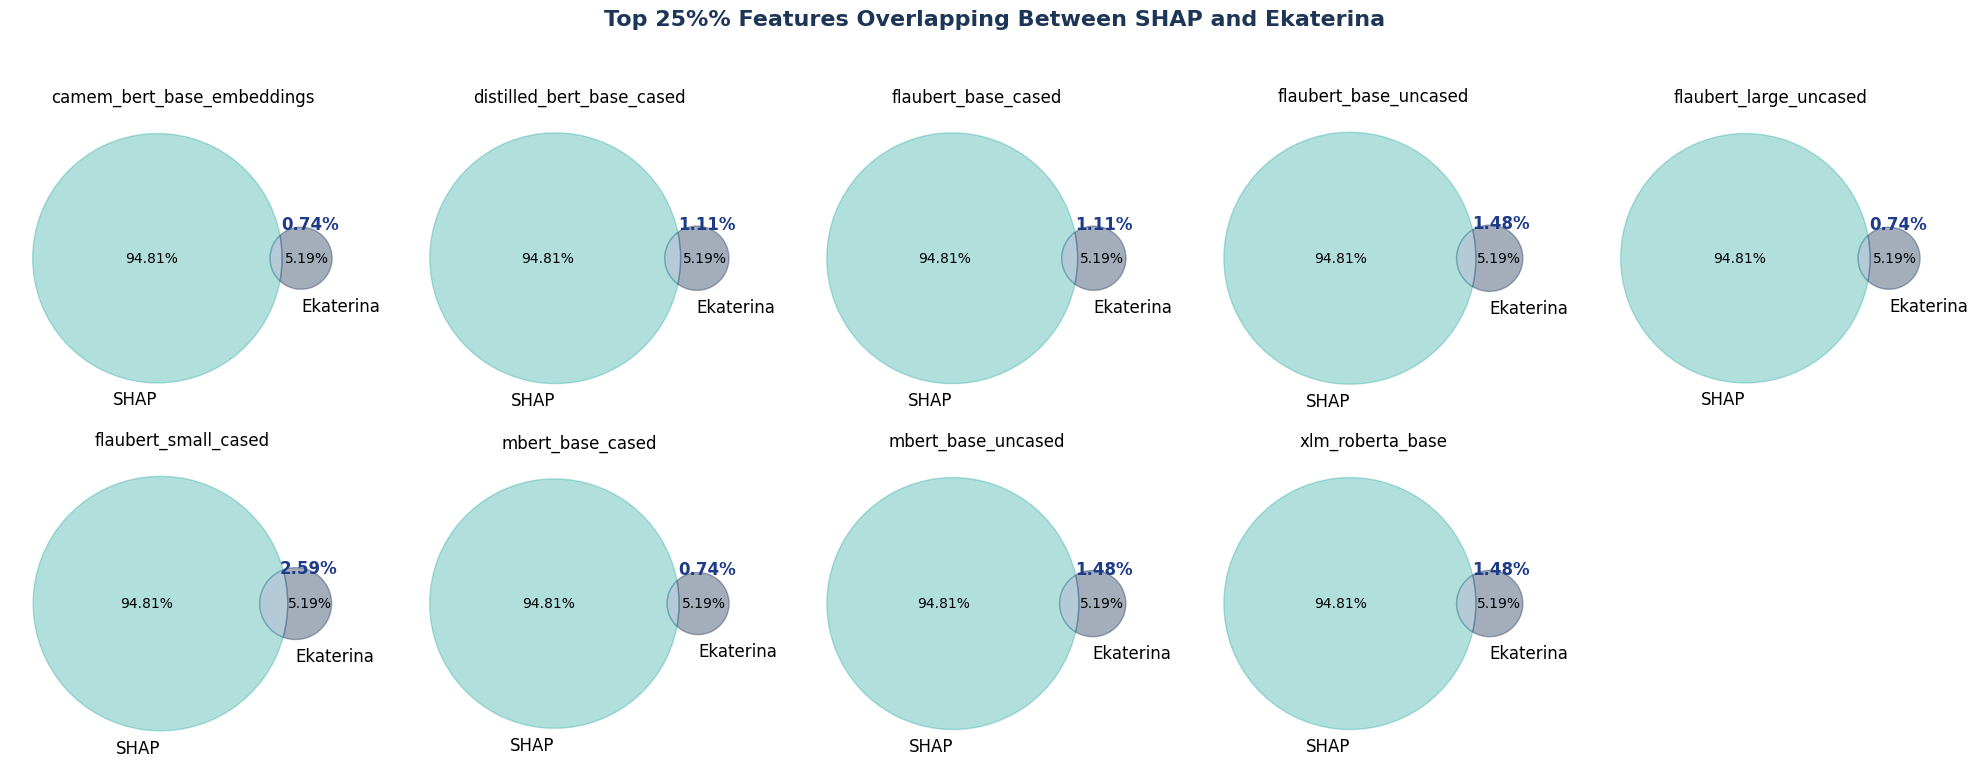

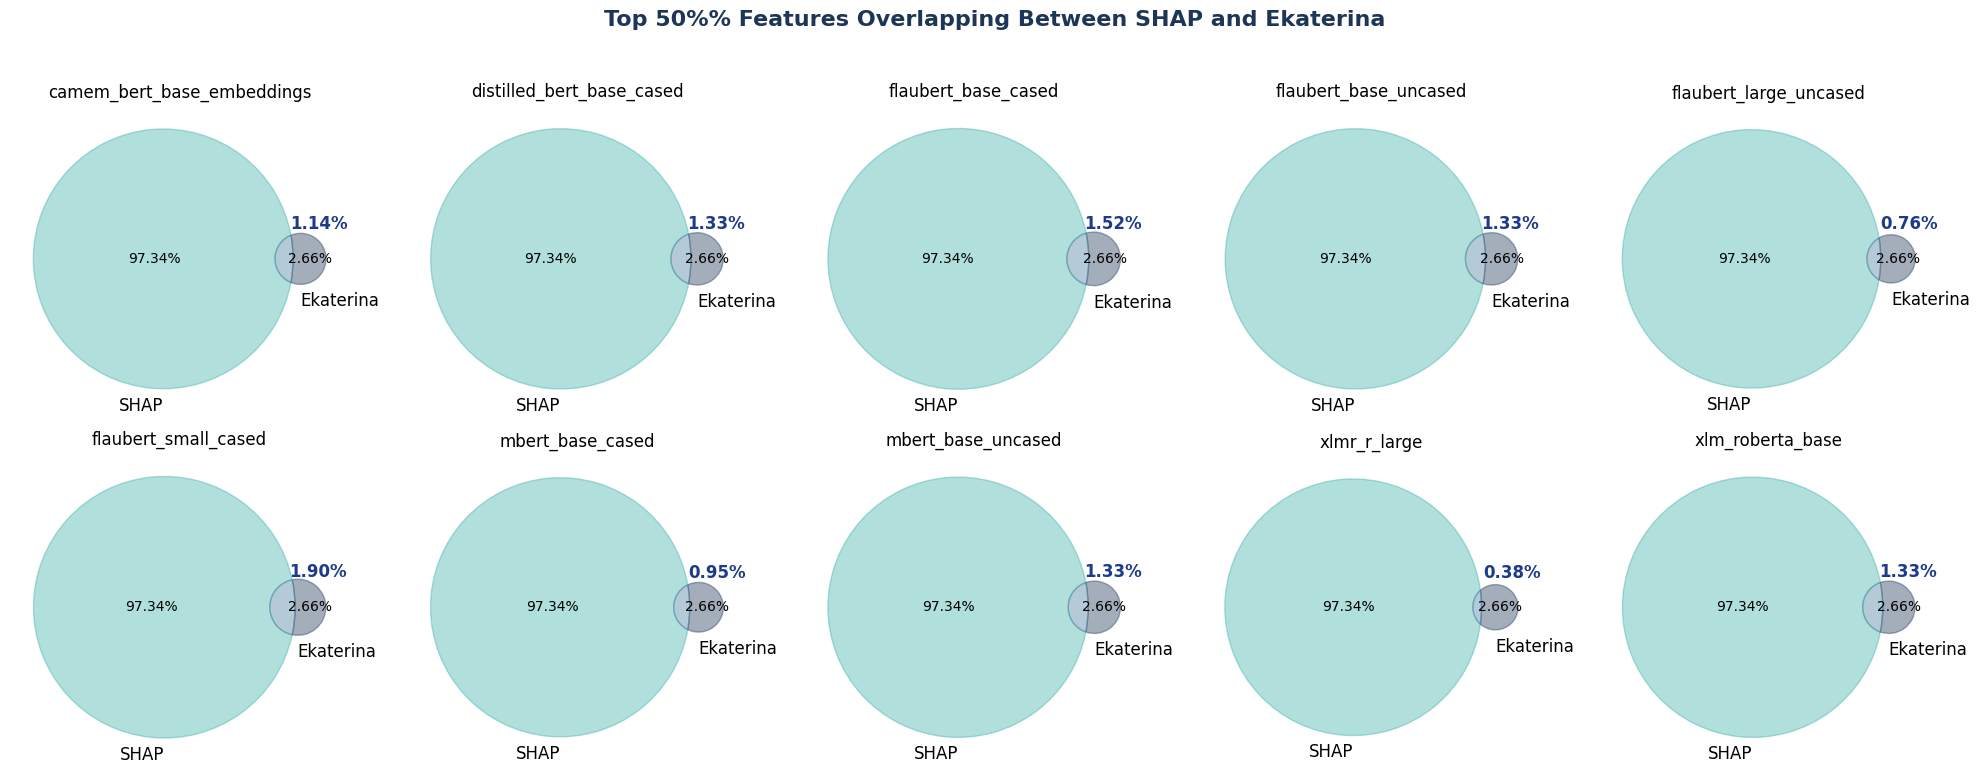

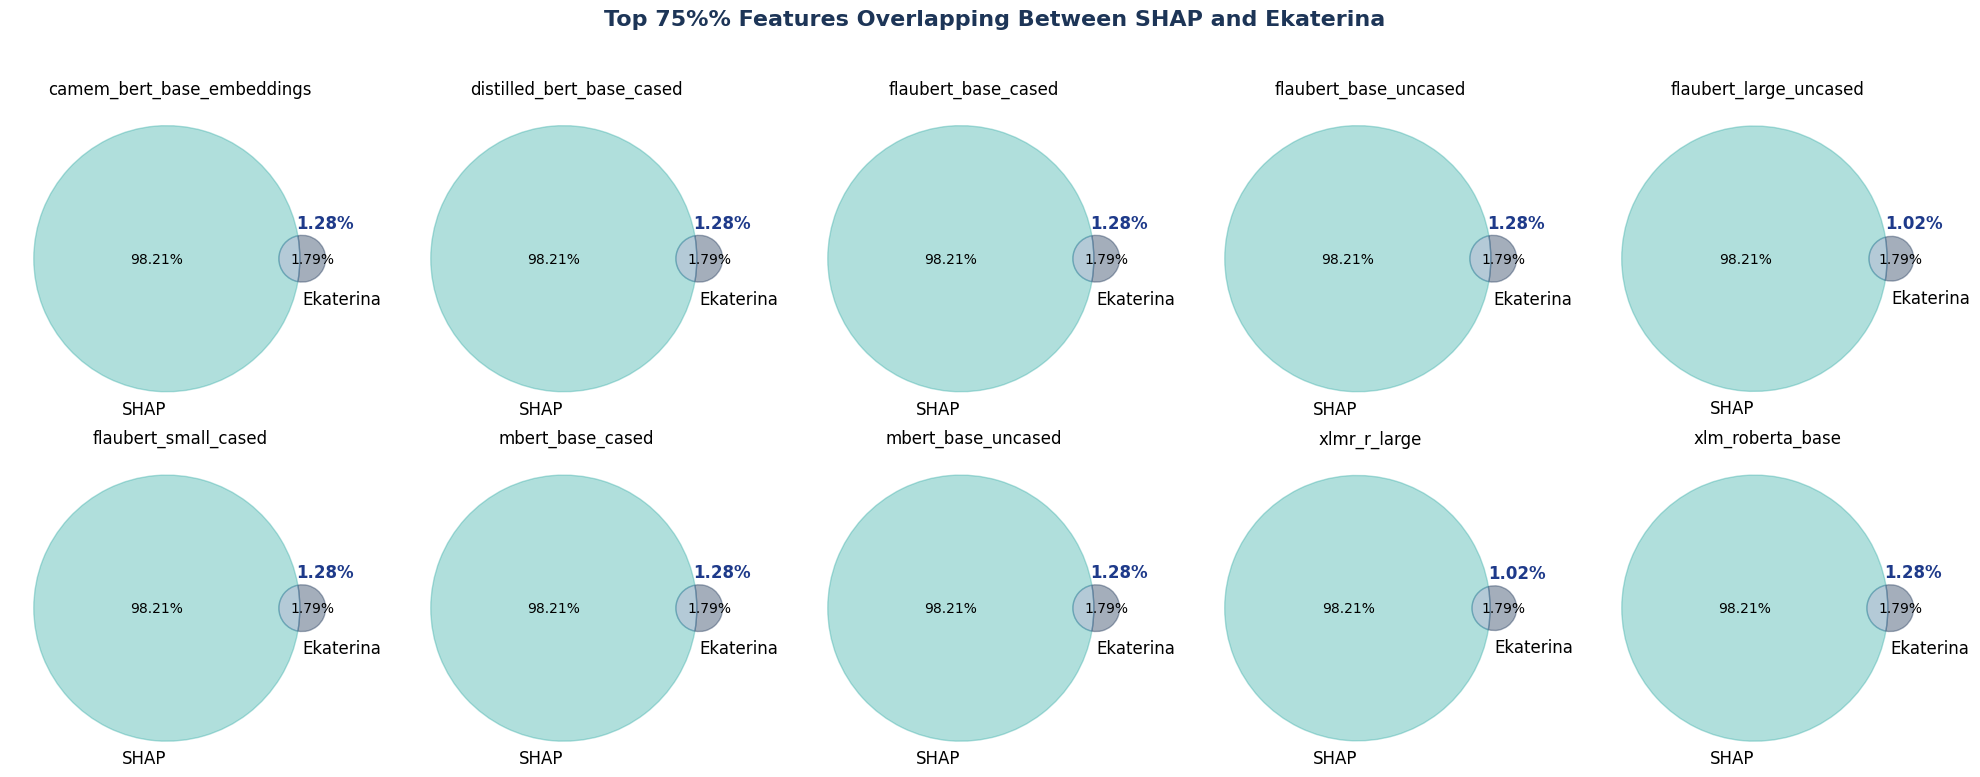

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import math

# Filter the overlap_df to remove rows with empty 'Common Features'
overlap_df = overlap_df[overlap_df['Common Features'].astype(str) != '']

# Get unique percentage levels from the 'Top Percentage' column
percentage_levels = sorted(overlap_df["Top Percentage"].unique())

# Define grid size (5 models per row)
cols = 5

# Iterate through each percentage level
for percent in percentage_levels:
    # Filter DataFrame for the current percentage
    df_filtered = overlap_df[overlap_df["Top Percentage"] == percent]

    # Define the number of rows based on the number of models in this percentage
    num_models = len(df_filtered)
    rows = math.ceil(num_models / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
    axes = axes.flatten()

    # Generate Venn diagrams for each model
    for idx, (index, row) in enumerate(df_filtered.iterrows()):
        ax = axes[idx]

        # Get values from DataFrame
        shap_features = row["Total SHAP Features"]
        ekaterina_features = row["Ekaterina Total Dimensions"]
        common_features = row["Common Features Count"]

        # Calculate percentages for SHAP only, Ekaterina only, and Common features
        shap_percentage = (shap_features / (shap_features + ekaterina_features)) * 100 if (shap_features + ekaterina_features) > 0 else 0
        ekaterina_percentage = (ekaterina_features / (shap_features + ekaterina_features)) * 100 if (shap_features + ekaterina_features) > 0 else 0
        common_percentage = (common_features / (shap_features + ekaterina_features)) * 100 if (shap_features + ekaterina_features) > 0 else 0

        # Create Venn diagram
        venn = venn2(
            subsets=(shap_percentage, ekaterina_percentage, common_percentage),
            set_labels=("SHAP", "Ekaterina"),
            ax=ax
        )

        # Set custom darker colors
        if venn.get_patch_by_id('10'):
            venn.get_patch_by_id('10').set_color("#3aafa9")  # SHAP only (Darker)
        if venn.get_patch_by_id('01'):
            venn.get_patch_by_id('01').set_color("#1d3557")  # Ekaterina only (Darker)
        if venn.get_patch_by_id('11'):
            venn.get_patch_by_id('11').set_color("#457b9d")  # Intersection (Darker)

        # Format the percentage text in the Venn diagram labels
        venn.get_label_by_id('10').set_text(f'{shap_percentage:.2f}%')
        venn.get_label_by_id('01').set_text(f'{ekaterina_percentage:.2f}%')

        # Manually position the intersection label outside the intersection circle
        intersection_label = venn.get_label_by_id('11')
        if intersection_label:
            intersection_label.set_text(f'{common_percentage:.2f}%')
            # Apply bold and blue style for the intersection label
            intersection_label.set_fontsize(12)
            intersection_label.set_fontweight('bold')
            intersection_label.set_color('#1e3a8a')  # Blue color

            # Get the position of the intersection label
            x, y = intersection_label.get_position()
            # Offset the label position outside the intersection area
            intersection_label.set_position((x + 0.15, y + 0.15))  # Adjust these values for better placement

        ax.set_title(f"{row['Model']}")

    # Hide empty subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    # Formatting
    plt.suptitle(f"{percent}% Features Overlapping Between SHAP and Ekaterina", fontsize=16, fontweight="bold", color="#1d3557")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
import pandas as pd

# Prepare data for saving
overlap_results = []

for model, percent_data in overlap_percentage_per_model.items():
    for percent, overlap_percentage in percent_data.items():
        # Get total SHAP features for the model at the given percentage
        shap_features = top_shap_features[model][percent]
        total_shap_features = len(shap_features)

        # Initialize variables
        ekaterina_model = model_mapping.get(model, None)
        total_ekaterina_features = 0
        common_features = set()
        shap_unique_features = set()
        ekaterina_unique_features = set()

        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]

            if perc_column in model_row.columns:
                ekaterina_features = set(model_row[perc_column].values[0])
                total_ekaterina_features = len(ekaterina_features)

                # Compute common and unique features
                common_features = shap_features.intersection(ekaterina_features)
                shap_unique_features = shap_features - ekaterina_features
                ekaterina_unique_features = ekaterina_features - shap_features

        # Append the results to the list
        overlap_results.append({
            "Model": model,
            "Top Percentage": f"Top {percent}%",
            "Common Features Count": len(common_features),
            "Common Features": ", ".join(map(str, common_features)),
            #"Total SHAP Features": total_shap_features,
            #"Ekaterina Total Dimensions": total_ekaterina_features,
            "Overlap Percentage": f"{overlap_percentage:.2f}%",
            #"Unique SHAP Features": len(shap_unique_features),
            "Unique SHAP Feature List": ", ".join(map(str, list(shap_unique_features))),
            #"Unique Ekaterina Features": len(ekaterina_unique_features),
            "Unique Ekaterina Feature List": ", ".join(map(str, list(ekaterina_unique_features)))
        })

# Convert to DataFrame
overlap_df_v2= pd.DataFrame(overlap_results)

In [ ]:
ekaterina_unique_features

set()

In [ ]:
# Filter to keep only rows with non-empty Common Features
overlap_df_v2 = overlap_df_v2[overlap_df_v2['Common Features'].astype(str) != '']

# Define the Flaubert models to keep
flaubert_models = [
    'flaubert_base_cased',
    'flaubert_base_uncased',
    'flaubert_large_uncased',
    'flaubert_small_cased'
]

# Filter DataFrame to only include these models
filtered_flaubert_df = overlap_df_v2[overlap_df_v2['Model'].isin(flaubert_models)]

# Show the resulting DataFrame
filtered_flaubert_df.head()

,Model,Top Percentage,Common Features Count,Common Features,Overlap Percentage,Unique SHAP Feature List,Unique Ekaterina Feature List
15,flaubert_base_cased,Top 25%,3,"9, 7, 2",1.17%,"738, 333, 283, 741, 307, 535, 635, 483, 423, 5...","0, 1, 6, 3, ], 4, 8, ,, , 5, ["
16,flaubert_base_cased,Top 50%,8,"0, 9, 7, 1, 3, 4, 2, 5",1.56%,"450, 738, 333, 713, 49, 564, 741, 535, 620, 28...","6, ], 8, ,, , ["
17,flaubert_base_cased,Top 75%,10,"0, 9, 7, 1, 3, 6, 4, 8, 2, 5",1.30%,"642, 450, 738, 333, 713, 49, 186, 564, 210, 74...",",, , ], ["
21,flaubert_base_uncased,Top 25%,4,"0, 2, 6, 4",1.56%,"713, 210, 564, 405, 412, 280, 423, 748, 11, 11...","9, 7, 1, 3, ], 8, ,, , 5, ["
22,flaubert_base_uncased,Top 50%,7,"0, 1, 6, 3, 4, 8, 2",1.37%,"642, 450, 738, 713, 49, 210, 564, 535, 405, 35...","9, 7, ], ,, , 5, ["


In [ ]:
import pandas as pd

# Step 1: Filter non-empty common features
overlap_df_v2 = overlap_df_v2[overlap_df_v2['Common Features'].astype(str) != '']

# Step 2: Define Flaubert models
flaubert_models = [
    'flaubert_base_cased',
    'flaubert_base_uncased',
    'flaubert_large_uncased',
    'flaubert_small_cased'
]

# Step 3: Filter for those models
filtered_flaubert_df = overlap_df_v2[overlap_df_v2['Model'].isin(flaubert_models)].copy()

# Step 4: Map to Ekaterina model short names
model_mapping = {
    'flaubert_base_cased': 'flau_base_c',
    'flaubert_base_uncased': 'flau_base_u',
    'flaubert_large_uncased': 'flau_large_c',
    'flaubert_small_cased': 'flau_small_c'
}
filtered_flaubert_df['Model'] = filtered_flaubert_df['Model'].map(model_mapping)

# Step 5: Extract numeric top percentage
filtered_flaubert_df['Top %'] = filtered_flaubert_df['Top Percentage'].str.extract(r'(\d+)').astype(int)

# Step 6: Reorder columns and sort
refined_df = filtered_flaubert_df[[
    'Top %',
    'Model',
    'Common Features Count',
    'Common Features',
    'Overlap Percentage',
    'Unique SHAP Feature List',
    'Unique Ekaterina Feature List'
]].sort_values(by=['Top %', 'Model']).reset_index(drop=True)

# Optional: Set 'Top %' as index if you want that grouping structure
# You can also groupby for display if needed
# grouped = refined_df.groupby('Top %')

# Display
refined_df


,Top %,Model,Common Features Count,Common Features,Overlap Percentage,Unique SHAP Feature List,Unique Ekaterina Feature List
0,25,flau_base_c,3,"9, 7, 2",1.17%,"738, 333, 283, 741, 307, 535, 635, 483, 423, 5...","0, 1, 6, 3, ], 4, 8, ,, , 5, ["
1,25,flau_base_u,4,"0, 2, 6, 4",1.56%,"713, 210, 564, 405, 412, 280, 423, 748, 11, 11...","9, 7, 1, 3, ], 8, ,, , 5, ["
2,25,flau_large_c,2,"7, 5",0.78%,"907, 186, 828, 413, 757, 210, 535, 860, 917, 1...","0, 9, 1, 6, 3, ], 4, 8, ,, 2, , ["
3,25,flau_small_c,7,"9, 7, 3, 4, 8, 2, 5",2.73%,"331, 186, 210, 307, 405, 35, 412, 483, 423, 11...","0, 1, 6, ], ,, , ["
4,50,flau_base_c,8,"0, 9, 7, 1, 3, 4, 2, 5",1.56%,"450, 738, 333, 713, 49, 564, 741, 535, 620, 28...","6, ], 8, ,, , ["
5,50,flau_base_u,7,"0, 1, 6, 3, 4, 8, 2",1.37%,"642, 450, 738, 713, 49, 210, 564, 535, 405, 35...","9, 7, ], ,, , 5, ["
6,50,flau_large_c,4,"6, 7, 5, 4",0.78%,"186, 828, 210, 938, 535, 984, 860, 917, 35, 28...","0, 9, 1, 3, ], 8, 2, ,, , ["
7,50,flau_small_c,10,"0, 9, 7, 1, 6, 3, 4, 8, 2, 5",1.95%,"450, 186, 333, 49, 210, 405, 35, 412, 280, 423...",",, , ], ["
8,75,flau_base_c,10,"0, 9, 7, 1, 3, 6, 4, 8, 2, 5",1.30%,"642, 450, 738, 333, 713, 49, 186, 564, 210, 74...",",, , ], ["
9,75,flau_base_u,10,"0, 9, 7, 1, 3, 6, 4, 8, 2, 5",1.30%,"642, 450, 738, 333, 713, 49, 186, 210, 564, 74...",",, , ], ["


In [ ]:
import re

# Function to clean and extract integers from a string list
def extract_integers(s):
    if isinstance(s, str):
        return [int(x) for x in re.findall(r'\b\d+\b', s)]
    return []

# Apply the function to each column that needs cleanup
refined_df['Unique Ekaterina Feature List'] = refined_df['Unique Ekaterina Feature List'].apply(extract_integers)
refined_df['Common Features'] = refined_df['Common Features'].apply(extract_integers)
refined_df['Unique SHAP Feature List'] = refined_df['Unique SHAP Feature List'].apply(extract_integers)

# Display the cleaned DataFrame
refined_df


,Top %,Model,Common Features Count,Common Features,Overlap Percentage,Unique SHAP Feature List,Unique Ekaterina Feature List
0,25,flau_base_c,3,"[9, 7, 2]",1.17%,"[738, 333, 283, 741, 307, 535, 635, 483, 423, ...","[0, 1, 6, 3, 4, 8, 5]"
1,25,flau_base_u,4,"[0, 2, 6, 4]",1.56%,"[713, 210, 564, 405, 412, 280, 423, 748, 11, 1...","[9, 7, 1, 3, 8, 5]"
2,25,flau_large_c,2,"[7, 5]",0.78%,"[907, 186, 828, 413, 757, 210, 535, 860, 917, ...","[0, 9, 1, 6, 3, 4, 8, 2]"
3,25,flau_small_c,7,"[9, 7, 3, 4, 8, 2, 5]",2.73%,"[331, 186, 210, 307, 405, 35, 412, 483, 423, 1...","[0, 1, 6]"
4,50,flau_base_c,8,"[0, 9, 7, 1, 3, 4, 2, 5]",1.56%,"[450, 738, 333, 713, 49, 564, 741, 535, 620, 2...","[6, 8]"
5,50,flau_base_u,7,"[0, 1, 6, 3, 4, 8, 2]",1.37%,"[642, 450, 738, 713, 49, 210, 564, 535, 405, 3...","[9, 7, 5]"
6,50,flau_large_c,4,"[6, 7, 5, 4]",0.78%,"[186, 828, 210, 938, 535, 984, 860, 917, 35, 2...","[0, 9, 1, 3, 8, 2]"
7,50,flau_small_c,10,"[0, 9, 7, 1, 6, 3, 4, 8, 2, 5]",1.95%,"[450, 186, 333, 49, 210, 405, 35, 412, 280, 42...",[]
8,75,flau_base_c,10,"[0, 9, 7, 1, 3, 6, 4, 8, 2, 5]",1.30%,"[642, 450, 738, 333, 713, 49, 186, 564, 210, 7...",[]
9,75,flau_base_u,10,"[0, 9, 7, 1, 3, 6, 4, 8, 2, 5]",1.30%,"[642, 450, 738, 333, 713, 49, 186, 210, 564, 7...",[]


In [ ]:
#You can turn the lists in each cell into comma-separated strings for clean export:

# Convert list columns to comma-separated strings
refined_df_export = refined_df.copy()
list_columns = [
    'Unique Ekaterina Feature List',
    'Common Features',
    'Unique SHAP Feature List'
]

for col in list_columns:
    refined_df_export[col] = refined_df_export[col].apply(lambda x: ", ".join(map(str, x)))

# Display the cleaned DataFrame ready for export
refined_df_export.head()


,Top %,Model,Common Features Count,Common Features,Overlap Percentage,Unique SHAP Feature List,Unique Ekaterina Feature List
0,25,flau_base_c,3,"9, 7, 2",1.17%,"738, 333, 283, 741, 307, 535, 635, 483, 423, 5...","0, 1, 6, 3, 4, 8, 5"
1,25,flau_base_u,4,"0, 2, 6, 4",1.56%,"713, 210, 564, 405, 412, 280, 423, 748, 11, 11...","9, 7, 1, 3, 8, 5"
2,25,flau_large_c,2,"7, 5",0.78%,"907, 186, 828, 413, 757, 210, 535, 860, 917, 1...","0, 9, 1, 6, 3, 4, 8, 2"
3,25,flau_small_c,7,"9, 7, 3, 4, 8, 2, 5",2.73%,"331, 186, 210, 307, 405, 35, 412, 483, 423, 11...","0, 1, 6"
4,50,flau_base_c,8,"0, 9, 7, 1, 3, 4, 2, 5",1.56%,"450, 738, 333, 713, 49, 564, 741, 535, 620, 28...","6, 8"


In [ ]:
#convert to latex to overleaf

#Use the built-in pandas .to_latex() method:
latex_table = refined_df_export.to_latex(index=False, escape=False)

# Optional: Save to a `.tex` file
with open("shap_ekaterina_annex_table.tex", "w", encoding="utf-8") as f:
    f.write(latex_table)

print("✅ LaTeX table saved for Overleaf.")



✅ LaTeX table saved for Overleaf.


In [ ]:
refined_df_export.to_csv("shap_eka_perc.csv", index=False)
import pandas as pd

df_from_csv = pd.read_csv("flaubert_overlap_clean.csv")
df_from_csv.head()


,Top %,Model,Common Features Count,Common Features,Overlap Percentage,Unique SHAP Feature List,Unique Ekaterina Feature List
0,25,flau_base_c,3,"9, 7, 2",1.17%,"738, 333, 283, 741, 307, 535, 635, 483, 423, 5...","0, 1, 6, 3, 4, 8, 5"
1,25,flau_base_u,4,"0, 2, 6, 4",1.56%,"713, 210, 564, 405, 412, 280, 423, 748, 11, 11...","9, 7, 1, 3, 8, 5"
2,25,flau_large_c,2,"7, 5",0.78%,"907, 186, 828, 413, 757, 210, 535, 860, 917, 1...","0, 9, 1, 6, 3, 4, 8, 2"
3,25,flau_small_c,7,"9, 7, 3, 4, 8, 2, 5",2.73%,"331, 186, 210, 307, 405, 35, 412, 483, 423, 11...","0, 1, 6"
4,50,flau_base_c,8,"0, 9, 7, 1, 3, 4, 2, 5",1.56%,"450, 738, 333, 713, 49, 564, 741, 535, 620, 28...","6, 8"
